In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style="whitegrid", palette = ("tab10"))
import warnings;warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

drug = pd.read_csv('drug200.csv');drug.columns = drug.columns.str.lower()
drug.head(10)



,age,sex,bp,cholesterol,na_to_k,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [6]:
# by using Lable Encoder
lb = LabelEncoder()
cols = ['sex','bp','cholesterol']
for col in cols:
    drug[col] = lb.fit_transform(drug[col].values)
drug.head(10)

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
5,22,0,2,0,8.607,drugX
6,49,0,2,0,16.275,drugY
7,41,1,1,0,11.037,drugC
8,60,1,2,0,15.171,drugY
9,43,1,1,1,19.368,drugY


In [7]:
X = drug.drop(columns = 'drug')
y = drug['drug']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 5)

In [8]:
ss = StandardScaler()
ss = ss.fit(X_train)
X_train_trans = ss.transform(X_train)
X_train_trans[:5]


array([[-0.47985612, -1.06904497,  1.35340079, -0.98675438,  0.15031413],
       [-0.11785234,  0.93541435,  0.13044827, -0.98675438,  0.60913529],
       [-1.26419764,  0.93541435,  1.35340079, -0.98675438, -0.48204276],
       [ 0.66648918,  0.93541435,  1.35340079,  1.01342342, -1.18561546],
       [-1.44519953, -1.06904497,  1.35340079,  1.01342342, -0.90131523]])

In [9]:
y_train.value_counts()

drug
drugY    64
drugX    43
drugA    20
drugB    12
drugC    11
Name: count, dtype: int64

In [10]:
sm = SMOTE(random_state = 2)
X_train_sm,y_train_sm = sm.fit_resample(X_train_trans, y_train)
y_train_sm.value_counts()

drug
drugY    64
drugX    64
drugA    64
drugC    64
drugB    64
Name: count, dtype: int64

In [11]:
clf = DecisionTreeClassifier()
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "criterion": ["gini", "entropy"]}
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_sm, y_train_sm),grid_search.best_estimator_,grid_search.best_score_

(GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [3, None], 'max_features': [1, 3, 10],
                          'min_samples_split': [2, 3, 10]}),
 DecisionTreeClassifier(max_features=3, min_samples_split=3),
 0.996875)

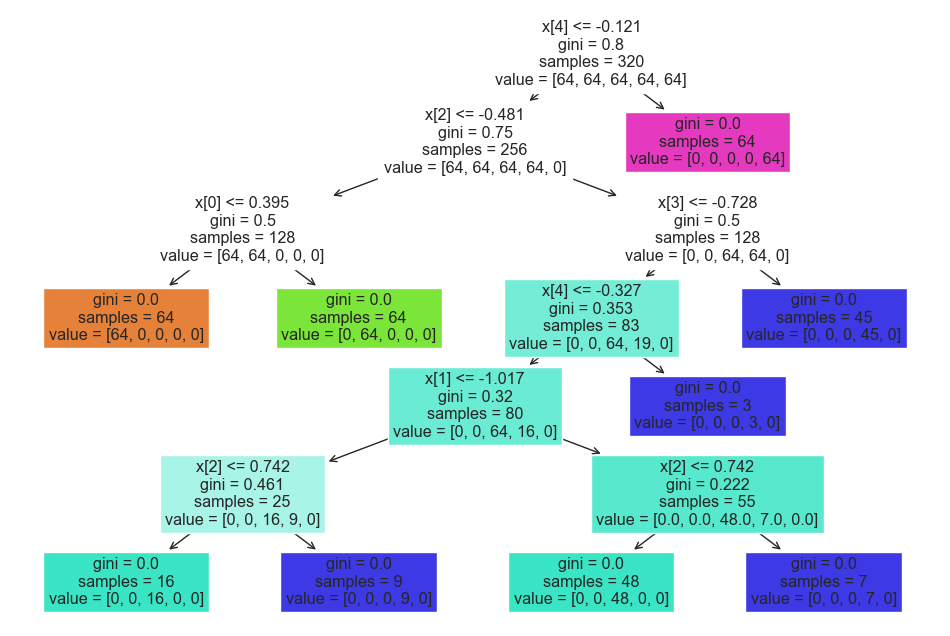

In [15]:
model = DecisionTreeClassifier(max_features=3, min_samples_split=10).fit(X_train_sm, y_train_sm)
plt.figure(figsize = (12, 8))
plot_tree(model,filled=True)
plt.show()